### Import necessary libraries 📚

In [17]:
import pandas as pd
import numpy as np

import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import fcluster
from scipy.spatial import KDTree

import umap.umap_ as umap

⬇️⬇️⬇️ This will all be replaced with a query to the database ⬇️⬇️⬇️

In [18]:
df = pd.read_csv("./example.csv")
df = pd.DataFrame(df.iloc[:,[2,3,8]])
df

,degree,designation,skills
0,Bachelors COMPUTER SCIENCE,front-end developer,"html, css, react, bootstrap, flexbox"
1,Masters Statistics,data scientist,"cleaning data, statatistical analysis, data an..."
2,Bachelors COMPUTER SCIENCE,"data analyst, ML Engineer intern","cleaning data, sql, power bi, aws, analysis"
3,Masters Computer Science,data scientist,"sql, python, machine learning, tableau,"
4,Masters Psychology,Human Resources Manager,"Recruiting, Interviewing, management, microsof..."
5,Bachelors Computer Science,backend developer,"github, node.js, python, django"
6,Bachelors in Computer Science,backend,"github, node.js, python, django, css"
7,NaN,Human Resources,"Employee relations, management, administrative,"
8,Bachelors in Computer Science,backend developer,"github, node.js, python, django, serverless co..."
9,Associates in Computer Science,backend developer,"git, node.js, php, sql, javascript"


In [19]:
df.insert(len(df.columns), "all_contents", "", True)
all_contents_column = []


for index in df.index:
    row = df.iloc[index] 
    rows_contents = []
    for i in range(len(df.columns)): 
        rows_contents.append(str(row[i]))
    all_contents_column.append(" ".join(rows_contents))

df['all_contents'] = all_contents_column

In [20]:
def cleanResume(resumeText):
    resumeText = re.sub(',+', ' ', resumeText)  # remove commas
    resumeText = re.sub('nan', '', resumeText)  # remove nan
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

df['all_contents'] = df['all_contents'].apply(lambda x: cleanResume(x))

⬆️⬆️⬆️⬆️⬆️⬆️End of data collection that will be replaced with DB query⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️

In [21]:
# REPLACE WITH DATABASE QUERY (ID + ALL VALUES)
requiredText = df['all_contents'].values
index = [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]

In [22]:
requiredText

array(['Bachelors COMPUTER SCIENCE front-end developer html css react bootstrap flexbox ',
       'Masters Statistics data scientist cleaning data statatistical analysis data analysis calculus python sql ',
       'Bachelors COMPUTER SCIENCE data analyst ML Engineer intern cleaning data sql power bi aws analysis ',
       'Masters Computer Science data scientist sql python machine learning tableau ',
       'Masters Psychology Human Resources Manager Recruiting Interviewing management microsoft office suite ',
       'Bachelors Computer Science backend developer github node.js python django ',
       'Bachelors in Computer Science backend github node.js python django css ',
       ' Human Resources Employee relations management administrative ',
       'Bachelors in Computer Science backend developer github node.js python django serverless computing aws javscript ',
       'Associates in Computer Science backend developer git node.js php sql javascript ',
       'Bachelors Arts front-e

In [23]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
X = word_vectorizer.transform(requiredText)

In [24]:
def get_umap(data, c=None, n_neighbors=4, min_dist=0.2, n_components=2, metric='cosine', title=''):
    fit = umap.UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=n_components,
    metric=metric,
    )
    u = fit.fit_transform(data)
    print(data)
    return u

data = X.toarray()
umap = get_umap(data)

new_df = pd.DataFrame()

new_df['umap_0'] = umap[:,0]
new_df['umap_1'] = umap[:,1]

[[0.         0.         0.         0.         0.         0.
  0.         0.22111457 0.         0.         0.40215606 0.
  0.         0.         0.22111457 0.         0.31163532 0.
  0.25868408 0.         0.         0.34920482 0.         0.40215606
  0.         0.         0.         0.         0.         0.34920482
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.34920482 0.         0.
  0.         0.22111457 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.44914658 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.30549758 0.26527321 0.         0.         0.         0.49681196
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.   

In [25]:
new_df

,umap_0,umap_1
0,-7.188618,-11.704089
1,0.371600,-14.850151
2,0.121620,-14.240747
3,-0.194050,-14.863713
4,-1.061735,1.058297
5,-9.037499,-12.038354
6,-8.183082,-12.480393
7,-2.018038,1.284985
8,-8.856729,-12.700626
9,-8.398949,-11.797853


⬇️⬇️⬇️ Clustering functionality is demonstrated below and will not be added to production code ⬇️⬇️⬇️

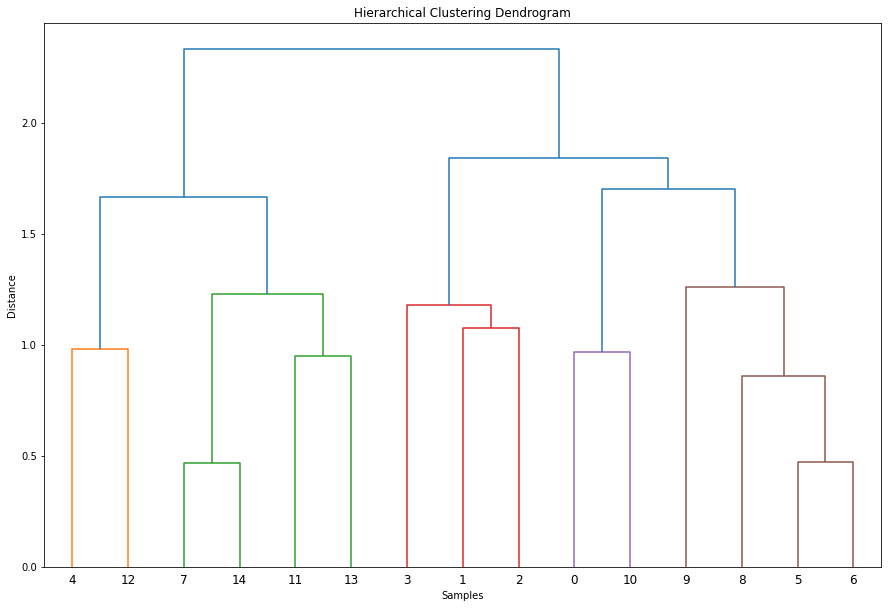

In [26]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import seaborn as sns


Z = shc.linkage(data, method='ward')

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
dend = shc.dendrogram(Z)

<Figure size 720x504 with 0 Axes>

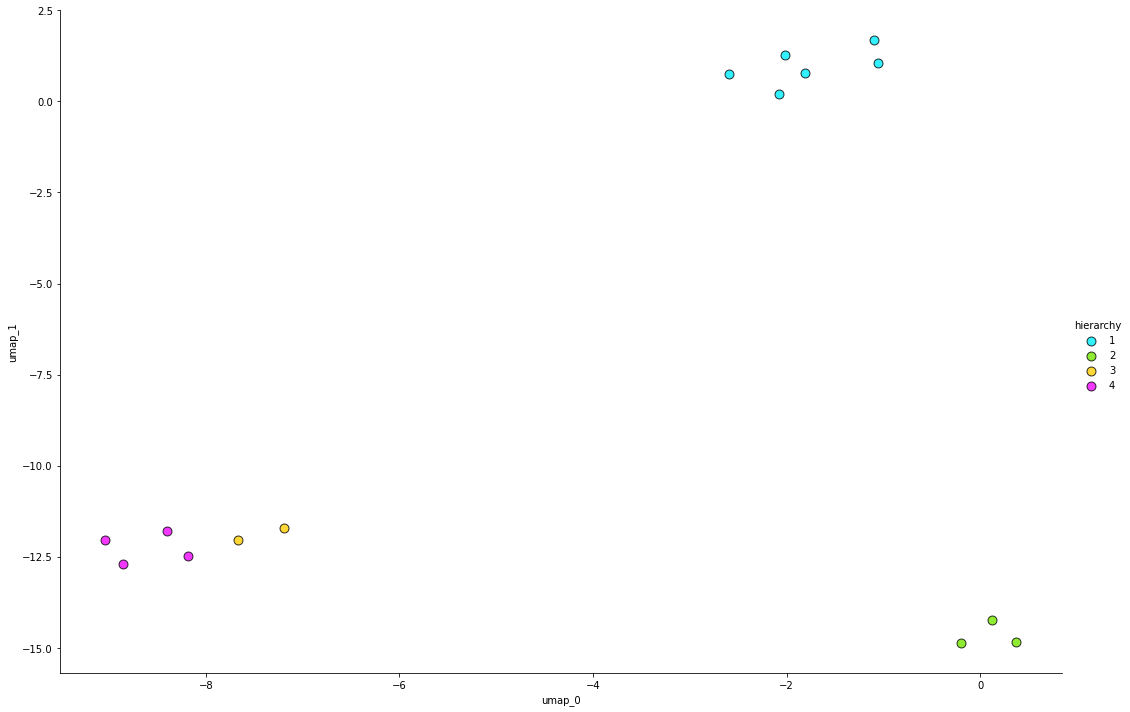

In [27]:

k=4
temp = fcluster(Z, k, criterion='maxclust')

new_df['hierarchy'] = temp

df_tf = pd.DataFrame(data, columns=word_vectorizer.get_feature_names_out())
df_tf['hierarchy'] = temp

plt.figure(figsize=(10,7))
sns.lmplot(x="umap_0",
          y="umap_1",
          data=new_df,
          fit_reg=False,
          hue='hierarchy',
          legend=True,
          height=10,
          aspect=1.5,
          palette="gist_ncar",
          scatter_kws={'edgecolor':'k',
                      's':80})

⬆️⬆️⬆️⬆️⬆️⬆️End of clustering functionality demonstration⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️

### Add UMAP coordinates to KDTree and query KDTree for nearest neighbors

In [28]:
tree_df = pd.DataFrame(new_df)
kdtree_arr = tree_df.to_numpy()
print(new_df)

      umap_0     umap_1  hierarchy
0  -7.188618 -11.704089          3
1   0.371600 -14.850151          2
2   0.121620 -14.240747          2
3  -0.194050 -14.863713          2
4  -1.061735   1.058297          1
5  -9.037499 -12.038354          4
6  -8.183082 -12.480393          4
7  -2.018038   1.284985          1
8  -8.856729 -12.700626          4
9  -8.398949 -11.797853          4
10 -7.663940 -12.054735          3
11 -2.600146   0.743851          1
12 -1.095770   1.674422          1
13 -2.076426   0.192795          1
14 -1.811189   0.791844          1


In [29]:
def makeTree(arr_of_points, target_point, num_neighbors):
    tree = KDTree(arr_of_points)
    dist, ind = tree.query([arr_of_points[target_point]], k=num_neighbors+1)
    new_list = list(ind[0])
    new_list.remove(target_point)
    return new_list

# def saveTree(tree):
#     pickled_tree = pickle.dumps(tree)
    # save pickled_tree to DB
    
# def loadTree():
    #load pickled_tree from DB
    #return pickled_tree

In [30]:
makeTree(kdtree_arr, 5, 4)

[9, 8, 6, 10]